# How to impute missing values with scikit-learn

In [1]:
%load_ext autoreload
%autoreload 2

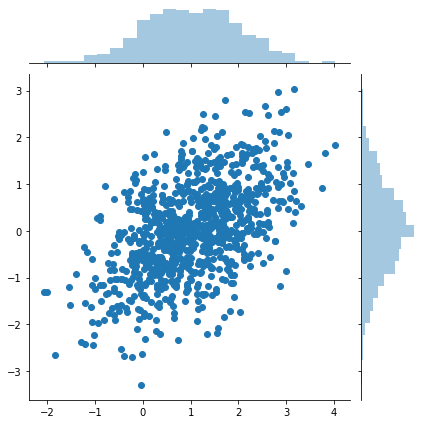

In [42]:
# first let's generate the complete data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(0)  # fix the seed 

n_samples = 900

# Generate normal data with covariance.
mean = (1,0)
cov = [[1,.5],[.5,1]]
X_complete = np.random.multivariate_normal(mean, cov, size=n_samples)
# X_complete = np.random.uniform(0, 1, size=(n_samples,2))

sns.jointplot(X_complete[:,0], X_complete[:,1], label = 'Complete data');

In [43]:
missing_mask = np.random.binomial(1, .2,
                                  X_complete.shape)
X_obs = X_complete.copy()
np.putmask(X_obs, missing_mask, np.nan)
X_obs[:10]

array([[-0.72779275,         nan],
       [-0.96805856,  0.27283464],
       [-0.12871372, -2.1059916 ],
       [        nan,         nan],
       [ 0.8840909 ,  0.2946894 ],
       [ 0.14811785,  0.60239136],
       [ 0.28008449, -0.59824049],
       [ 0.448766  , -0.21755967],
       [        nan, -1.39648956],
       [        nan,         nan]])

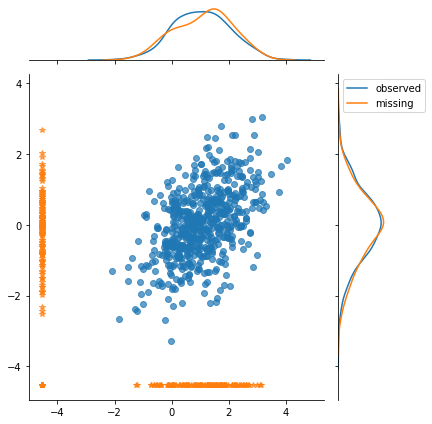

In [44]:
from utils_plot import (hist_plot, scatter_plot_obs,
                        scatter_plot_with_missing_completed,
                        scatter_plot_imputed)

scatter_plot_obs(X_obs)

# Impute with constant

The simplest way is to impute missing values with constant (e.g. 0, the mean or the median).

In [45]:
from sklearn.impute import SimpleImputer

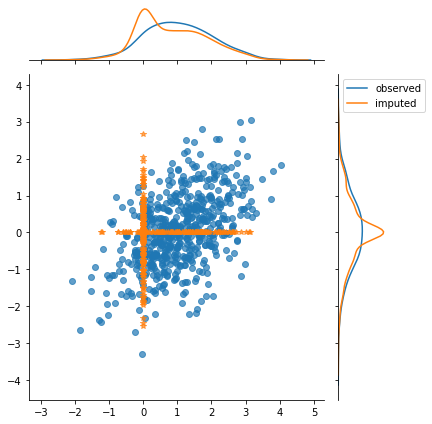

In [46]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_impute = imputer.fit_transform(X_obs)
scatter_plot_imputed(X_obs, X_impute)

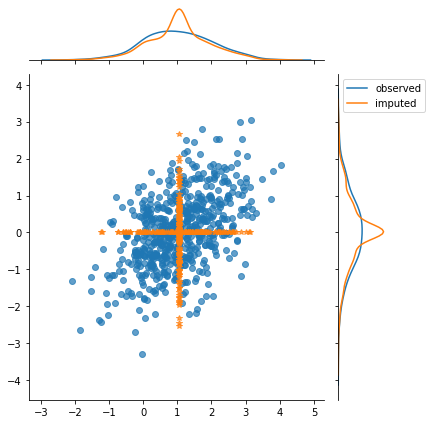

In [47]:
X_impute = SimpleImputer(strategy='mean').fit_transform(X_obs)
scatter_plot_imputed(X_obs, X_impute)

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

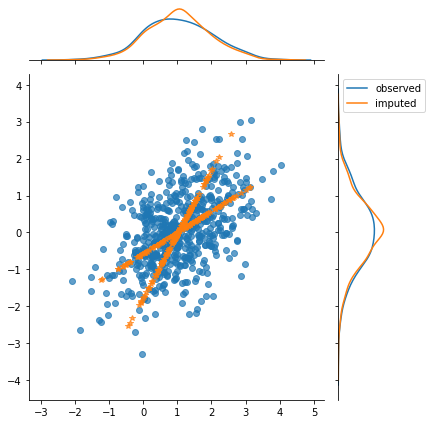

In [49]:
X_impute = IterativeImputer().fit_transform(X_obs)
scatter_plot_imputed(X_obs, X_impute)

In [ ]:
from sklearn.impute import MissingIndicator

from sklearn.pipeline import FeatureUnion, make_pipeline